### Credit Risk

#### Context:
Credit risk is nothing but the default in payment of any loan by the borrower. In Banking sector this is an important factor to
be considered before approving the loan of an applicant.Dream Housing Finance company deals in all home loans. They have presence
across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer
eligibility for loan.

Dataset:


|Variable | Description|
| --- | --- |
| Loan_ID	        |  Unique Loan ID|
| Gender	        |  Male/ Female|
| Married	        |  Applicant married (Y/N)|
| Dependents	    |  Number of dependents |
| Education	        |Applicant Education (Graduate/ Under Graduate)|
| Self_Employed	    |    Self employed (Y/N)|
| ApplicantIncome	|  Applicant income|
| CoapplicantIncome |    Coapplicant income|
| LoanAmount	    |  Loan amount in thousands|
| Loan_Amount_Term  |    Term of loan in months|
| Credit_History	|  credit history meets guidelines|
| Property_Area	    |    Urban/ Semi Urban/ Rural|
| Loan_Status	    |  Loan approved (Y/N)|

#### step1 Importing the dataset

In [43]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df=pd.read_csv('CreditRisk.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [46]:
df.shape

(614, 13)

In [47]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,141.166124,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,88.340630,65.12041,0.364878,0.463973
min,150.000000,0.000000,0.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,98.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,125.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


In [48]:
#converting loan amount to thousands
df['LoanAmount']=df['LoanAmount']*1000

In [49]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [50]:
# dropping Loan Id column
df.drop('Loan_ID',axis=1,inplace=True)

In [51]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [52]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

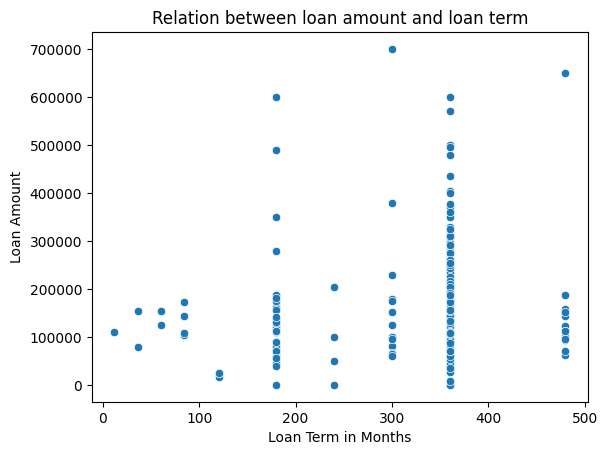

In [53]:
sns.scatterplot(x='Loan_Amount_Term',y='LoanAmount',data=df)
plt.title("Relation between loan amount and loan term")
plt.xlabel('Loan Term in Months')
plt.ylabel('Loan Amount')
plt.show()

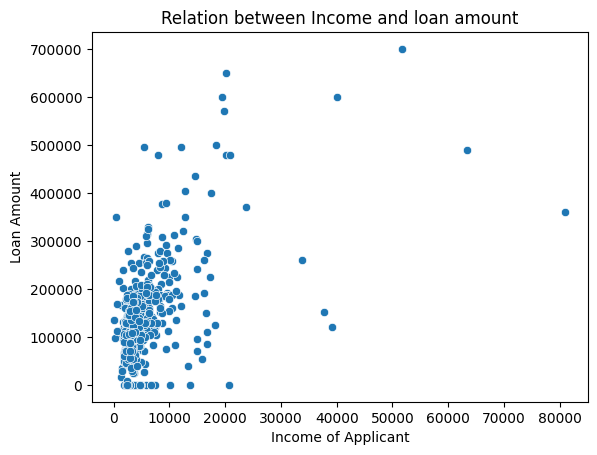

In [54]:
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',data=df)
plt.title("Relation between Income and loan amount")
plt.xlabel('Income of Applicant')
plt.ylabel('Loan Amount')
plt.show()

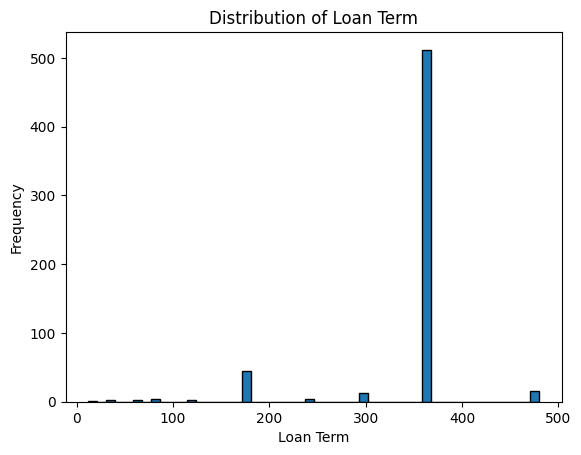

In [55]:
plt.hist(df['Loan_Amount_Term'],bins=50,edgecolor='black')
plt.title("Distribution of Loan Term")
plt.xlabel("Loan Term")
plt.ylabel('Frequency')
plt.show()

#### Loan amount term is highly skewed having most frequency around 360 months. So removing this feature

In [56]:
df.drop('Loan_Amount_Term',axis=1,inplace=True)

In [57]:
# checking null values
(round(df.isnull().sum()/len(df),2))*100

Gender               2.0
Married              0.0
Dependents           2.0
Education            0.0
Self_Employed        5.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Credit_History       8.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

### Replacing missing values with mode as all of them are categorical values

In [58]:
cat_cols=['Gender','Dependents','Self_Employed','Credit_History']
df[cat_cols]=df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [59]:
(round(df.isnull().sum()/len(df),2))*100

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

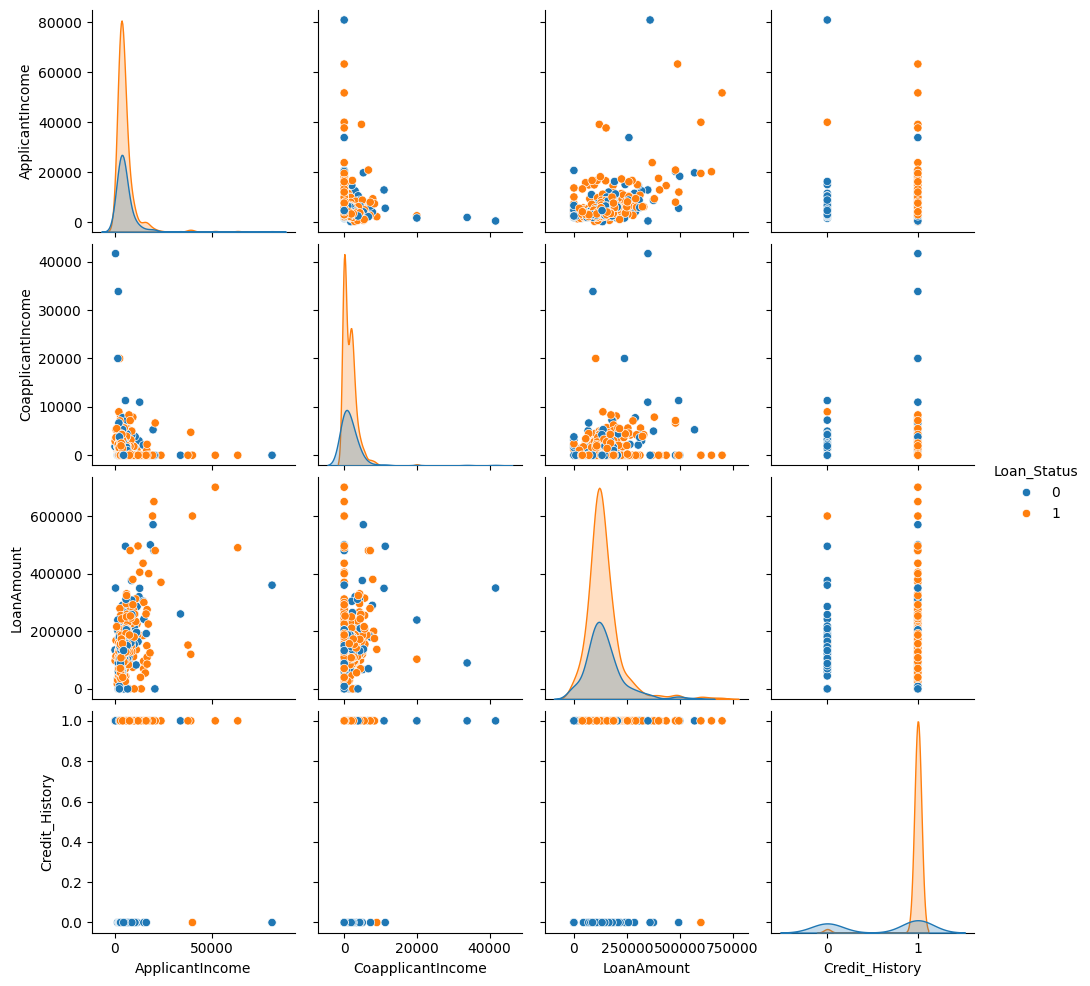

In [60]:
sns.pairplot(df,hue='Loan_Status')
plt.show()

In [61]:
df['Loan_Status'].value_counts(normalize=True)

Loan_Status
1    0.687296
0    0.312704
Name: proportion, dtype: float64

 **There seems to be a slight imbalance in the dataset as one class is 31.28% and the other is 68.72%**

### Defining X and Y Variables

In [62]:
X=df.drop('Loan_Status',axis=1)
Y=df[['Loan_Status']]

### Using One Hot Encoding to convert categorical variables to numerical variables

In [ ]:
# One-Hot Encoding for categorical columns
X = pd.get_dummies(X, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)




In [66]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    int64  
 3   Credit_History           614 non-null    float64
 4   Gender_Male              614 non-null    bool   
 5   Married_Yes              614 non-null    bool   
 6   Dependents_1             614 non-null    bool   
 7   Dependents_2             614 non-null    bool   
 8   Dependents_3+            614 non-null    bool   
 9   Education_Not Graduate   614 non-null    bool   
 10  Self_Employed_Yes        614 non-null    bool   
 11  Property_Area_Semiurban  614 non-null    bool   
 12  Property_Area_Urban      614 non-null    bool   
dtypes: bool(9), float64(2), int64(2)
memory usage: 24.7 KB


### Now split into training and test sets. We are splitting into a ratio of 70:30

In [68]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

## Decision Tree Model building

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [71]:
pred_train = dt_classifier.predict(X_train)
from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_train,pred_train)
print("confusion matrix = \n",mat_train)

confusion matrix = 
 [[123   0]
 [  0 306]]


In [72]:
y_pred=dt_classifier.predict(X_test)

In [74]:
mat_test=confusion_matrix(y_test,y_pred)
print("confusion matrix = \n",mat_test)

confusion matrix = 
 [[29 40]
 [25 91]]


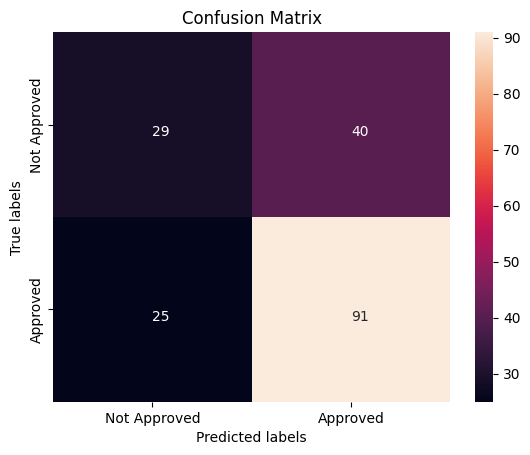

In [75]:
ax= plt.subplot()
ax.set_ylim(2.0, 0)
annot_kws = {"ha": 'left',"va": 'top'}

sns.heatmap(mat_test, annot=True, ax = ax, fmt= 'g',annot_kws=annot_kws); #annot=True to annotate cells

# labels, title and ticks

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Not Approved', 'Approved']);
ax.yaxis.set_ticklabels(['Not Approved', 'Approved']);